In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import random
from tqdm import tqdm
import cv2
from skimage.feature import hog
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Read Data
Read data from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Run for collaborator
#data_dir = "/content/drive/My Drive/Pengolahan Citra Digital/DatasetNeckbandB"

# Run for drive owner
data_dir = "/content/drive/My Drive/ILKOM/Semester 6/Tugas Akhir/Pengolahan Citra Digital/DatasetNeckbandB"
data_dir = pathlib.Path(data_dir)

In [4]:
# Count total number of image will be read
image_count = len(list(data_dir.glob('*/*.bmp')))
print(image_count)

0


# Augmentasi

In [5]:
import random
from skimage.transform import rotate
import imgaug.augmenters as iaa
import imgaug as ia
import albumentations as A
random.seed(1)

def augmentations(img):
  dimg = []
  dimg.append(img)

  # Rotation
  r_img = rotate(img, angle=random.randint(-180,180))*255
  dimg.append(r_img)

  # Scaling
  s_img = iaa.Affine(scale={"x": (random.randint(1,3),random.randint(1,3)), 
                            "y": (random.randint(1,3),random.randint(1,3))})
  s_img = s_img.augment_image(img)
  dimg.append(s_img)

  # Brightness
  tr = A.Compose([
                  A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0)
  ])
  b_img = tr(image=img)['image']
  dimg.append(b_img)

  # Flip
  fh_img = np.flipud(img)
  fv_img = np.fliplr(img)
  dimg.append(fh_img)
  dimg.append(fv_img)

  # Translate
  h, w = img.shape[:2]
  nh, nw = h/random.randint(1,h/2), w/random.randint(1,w/2)
  matrix = np.float32([[1,0,nw],
                      [0,1,nh]])
  t_img = cv2.warpAffine(img, matrix, (w,h))
  dimg.append(t_img)

  # Shearing
  shr_img = iaa.Affine(shear= (random.randint(-45,45),random.randint(-45,45)))
  shr_img = shr_img.augment_image(img)
  dimg.append(shr_img)

  return dimg

In [6]:
all_images = []
labels = []

class1 = list(data_dir.glob('class1/*'))
for it in tqdm(range(0,len(class1))):
    cls = 'class1'
    img = cv2.imread(str(class1[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class2 = list(data_dir.glob('class2/*'))
for it in tqdm(range(0,len(class2))):
    cls = 'class2'
    img = cv2.imread(str(class2[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class3 = list(data_dir.glob('class3/*'))
for it in tqdm(range(0,len(class3))):
    cls = 'class3'
    img = cv2.imread(str(class3[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class4 = list(data_dir.glob('class4/*'))
for it in tqdm(range(0,len(class4))):
    cls = 'class4'
    img = cv2.imread(str(class4[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class5 = list(data_dir.glob('class5/*'))
for it in tqdm(range(0,len(class5))):
    cls = 'class5'
    img = cv2.imread(str(class5[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class6 = list(data_dir.glob('class6/*'))
for it in tqdm(range(0,len(class6))):
    cls = 'class6'
    img = cv2.imread(str(class6[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class7 = list(data_dir.glob('class7/*'))
for it in tqdm(range(0,len(class7))):
    cls = 'class7'
    img = cv2.imread(str(class7[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class8 = list(data_dir.glob('class8/*'))
for it in tqdm(range(0,len(class8))):
    cls = 'class8'
    img = cv2.imread(str(class8[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

unidentified = list(data_dir.glob('class9/*'))
for it in tqdm(range(0,len(unidentified))):
    cls = 'unidentified'
    img = cv2.imread(str(unidentified[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

100%|██████████| 320/320 [02:27<00:00,  2.17it/s]


# Praproses

In [23]:
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.3,stratify=labels)

In [24]:
print('Training data and target sizes: \n{}, {}'.format(len(X_train), len(y_train)))
print('Test data and target sizes: \n{}, {}'.format(len(X_test), len(y_test)))

Training data and target sizes: 
1363, 1363
Test data and target sizes: 
585, 585


In [25]:
pd.Series(y_train).value_counts().sort_index()

class1          183
class2          147
class3          185
class4          129
class5          104
class6          136
class7          137
class8          118
unidentified    224
dtype: int64

In [26]:
pd.Series(y_test).value_counts().sort_index()

class1          79
class2          63
class3          79
class4          55
class5          45
class6          59
class7          58
class8          51
unidentified    96
dtype: int64

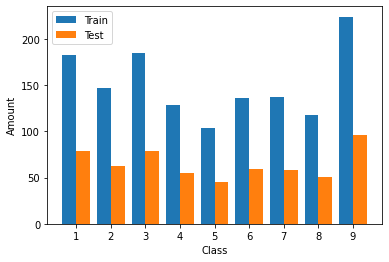

In [27]:
train_num = [183, 147, 185, 129, 104, 136, 137, 118, 224]
test_num = [79, 63, 79, 55, 45, 59, 58, 51, 96]

class_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
  
X_axis = np.arange(len(class_names))
  
plt.bar(X_axis - 0.2, train_num, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, test_num, 0.4, label = 'Test')
  
plt.xticks(X_axis, class_names)
plt.xlabel("Class")
plt.ylabel("Amount")
plt.legend()
plt.show()

In [28]:
temp_y_train = y_train
temp_x_train = X_train

y_train = []
X_train = []

hog_images = []

for it in tqdm(range(0,len(temp_x_train))):
    cls = temp_y_train[it]
    img = temp_x_train[it]
    augmen_img = augmentations(img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          X_train.append(fd)
      y_train.append(cls)

temp_x_test = X_test
X_test = []
for it in tqdm(range(0,len(temp_x_test))):
    img = temp_x_test[it]
    resized_img = resize(img, (48*1, 64*1))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), visualize=True, multichannel=True)
    if hog_image is not None:
        hog_images.append(hog_image)
        X_test.append(fd)

y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)

print('Training data and target sizes: \n{}, {}'.format(X_train.shape,len(y_train)))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,len(y_test)))

100%|██████████| 585/585 [00:14<00:00, 41.56it/s]


Training data and target sizes: 
(10904, 1260), 10904
Test data and target sizes: 
(585, 1260), 585


In [22]:
import pandas as pd
pd.Series(y_train).value_counts().sort_index()

class1          1464
class2          1176
class3          1480
class4          1032
class5           832
class6          1088
class7          1096
class8           944
unidentified    1792
dtype: int64

In [18]:
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
#classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
classifier = RandomForestClassifier()
classifier.fit(X_scaled, y_train)
preds = classifier.predict(scaler.transform(X_test))
print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))

test_accuracy = classifier.score(scaler.transform(X_test), y_test)
print(test_accuracy)

[[78  0  0  2  0  1  4  1  0]
 [ 0 62  1  0  4  1  0  1  5]
 [ 0  0 77  0  1  0  0  1  2]
 [ 0  0  0 52  0  0  0  1  0]
 [ 0  0  0  0 39  0  3  1  0]
 [ 0  0  1  1  0 55  0  2  1]
 [ 0  0  0  0  0  0 49  0  0]
 [ 0  0  0  0  1  2  0 40  1]
 [ 1  1  0  0  0  0  2  4 87]]
0.9213675213675213
0.9213675213675213


In [34]:
# Random Forest Classifier
print('> Random Forest Classifier')
random.seed(1)
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
rf_clf = RandomForestClassifier(random_state = 1)
rf_clf.fit(X_scaled, y_train)
rf_preds = rf_clf.predict(scaler.transform(X_test))
print(confusion_matrix(rf_preds, y_test))
print(accuracy_score(rf_preds, y_test))

# Logistic Regression
print()
print('> Logistic Regression Classifier')
random.seed(1)
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
lr_clf = LogisticRegression(random_state = 1)
lr_clf.fit(X_scaled, y_train)
lr_preds = lr_clf.predict(scaler.transform(X_test))
print(confusion_matrix(lr_preds, y_test))
print(accuracy_score(lr_preds, y_test))

# Decision Tree
print()
print('> Decision Tree Classifier')
random.seed(1)
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
dt_clf = DecisionTreeClassifier(random_state = 1)
dt_clf.fit(X_scaled, y_train)
dt_preds = dt_clf.predict(scaler.transform(X_test))
print(confusion_matrix(dt_preds, y_test))
print(accuracy_score(dt_preds, y_test))

> Random Forest Classifier
[[79  0  0  2  1  0  4  2  0]
 [ 0 62  0  0  3  2  0  0  2]
 [ 0  0 78  0  1  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0 36  0  1  0  0]
 [ 0  0  0  0  3 50  0  0  0]
 [ 0  0  0  0  0  6 50  0  0]
 [ 0  0  0  0  0  0  1 45  2]
 [ 0  1  1  0  1  1  2  4 92]]
0.9316239316239316

> Logistic Regression Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[79  0  0  0  0  0  0  1  1]
 [ 0 53  2  0  0  0  0  0  0]
 [ 0  2 75  0  1  2  0  0  3]
 [ 0  1  0 53  0  0  1  0  0]
 [ 0  1  0  0 41  0  0  1  1]
 [ 0  2  1  0  1 53  0  0  1]
 [ 0  0  0  0  2  3 54  0  3]
 [ 0  2  1  2  0  0  0 42  3]
 [ 0  2  0  0  0  1  3  7 84]]
0.9128205128205128

> Decision Tree Classifier
[[64  3  2  6  2  5  3  1  3]
 [ 1 42  0  1  1  2  0  1  3]
 [ 0  3 68  0  4  4  0  2  7]
 [ 4  0  0 39  1  1  1  0  2]
 [ 1  2  1  1 27  3  3  5  2]
 [ 2  5  1  0  0 36  3  5  1]
 [ 2  5  1  2  5  4 48  2  4]
 [ 4  1  5  3  3  3  0 31  4]
 [ 1  2  1  3  2  1  0  4 70]]
0.7264957264957265


In [44]:
import graphviz

fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(dt_clf, 
                   feature_names="a",  
                   class_names=class_names,
                   filled=True)
from google.colab import files

NameError: ignored

<Figure size 3600x2160 with 0 Axes>

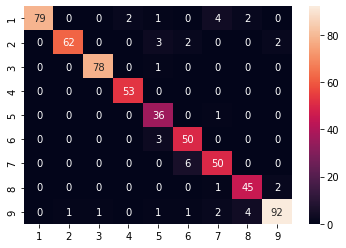

In [36]:
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(rf_preds, y_test), index = class_names,
                  columns = class_names)
sn.heatmap(df_cm, annot=True)

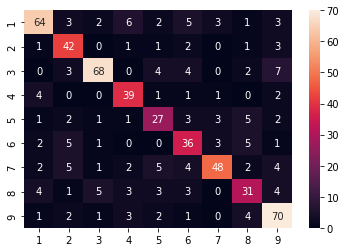

In [37]:
df_cm = pd.DataFrame(confusion_matrix(dt_preds, y_test), index = class_names,
                  columns = class_names)
sn.heatmap(df_cm, annot=True)

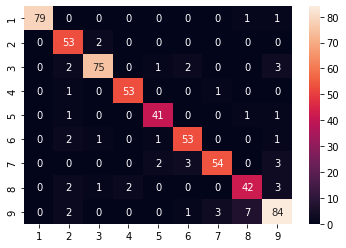

In [38]:
df_cm = pd.DataFrame(confusion_matrix(lr_preds, y_test), index = class_names,
                  columns = class_names)
sn.heatmap(df_cm, annot=True)

In [33]:
confusion_matrix(rf_preds, y_test)

array([[16, 13, 12,  4,  4,  9,  6, 12, 10],
       [13,  6,  7,  4,  6,  7, 10,  7, 14],
       [ 6,  6, 10, 13, 14,  4,  8,  8, 13],
       [ 6,  7,  9,  8,  4,  4,  4,  5,  6],
       [ 8,  2,  5,  5,  3,  5,  1,  5,  9],
       [ 7,  7,  8,  3,  2,  7,  7,  2, 10],
       [ 8,  4,  7,  6,  2,  4,  6,  6,  7],
       [ 4,  6,  7,  4,  1,  6,  6,  2, 10],
       [11, 12, 14,  8,  9, 13, 10,  4, 17]])

In [ ]:
class_number = [330, 299, 316, 202, 200, 200, 200, 201, 0]
class_number_reduce = [262, 210, 264, 184, 149, 195, 195, 169, 320]
fig, ax = plt.subplots()
ax.bar(range(1,9), class_number)
ax.set_xlabel("Class")
ax.set_ylabel("Amount")

In [ ]:
class_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
class_number = [330, 299, 316, 202, 200, 200, 200, 201, 0]
class_number_reduce = [262, 210, 264, 184, 149, 195, 195, 169, 320]
  
X_axis = np.arange(len(class_names))
  
plt.bar(X_axis - 0.2, class_number, 0.4, label = 'Before')
plt.bar(X_axis + 0.2, class_number_reduce, 0.4, label = 'After')
  
plt.xticks(X_axis, class_names)
plt.xlabel("Class")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

(10904, 1260)

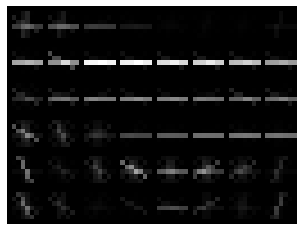

In [29]:
plt.axis("off")
plt.imshow(hog_images[0], cmap="gray")
X_train.shape

In [ ]:
import pandas as pd
pd.Series(labels).value_counts()

In [ ]:
y_test